In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Parkinsons_Disease.csv')
df = df.drop(['name'], axis=1)

In [3]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## Closer Look At The Features Of The Dataset

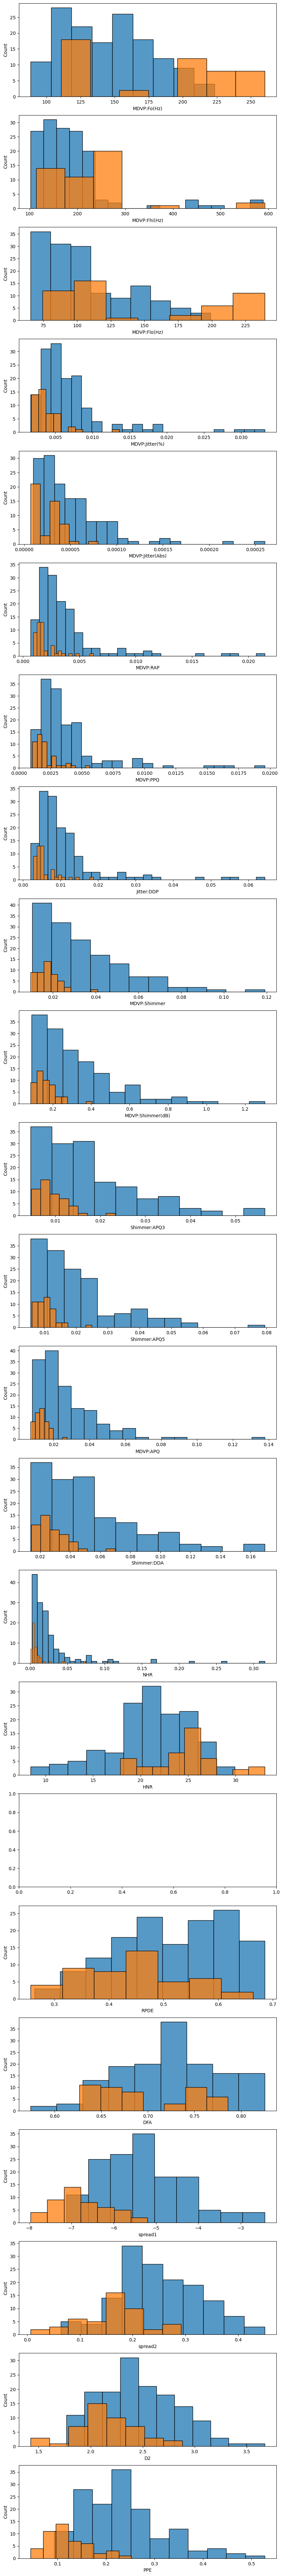

In [5]:
fig,axes = plt.subplots(nrows=23,ncols=1,figsize=(10,100))
for i in range(23):
    if df.columns[i] != 'status':
        sns.histplot(df[df['status']==1].iloc[:,i], ax=axes[i])
        sns.histplot(df[df['status']==0].iloc[:,i], ax=axes[i])

# Understanding Covariance Between Features

In [6]:
corr = df.corr().unstack().sort_values(ascending=False).drop_duplicates()[3:]

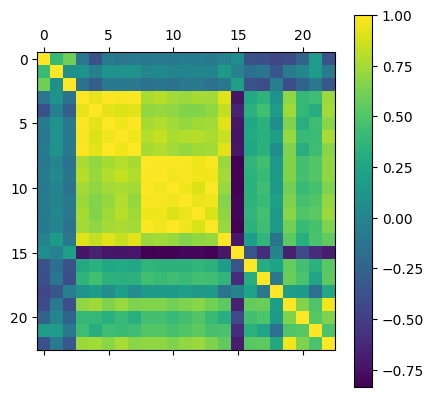

In [7]:
plt.matshow(df.corr())
plt.colorbar()

In [8]:
corr[0:23]

Jitter:DDP        MDVP:Jitter(%)      0.990276
MDVP:RAP          MDVP:Jitter(%)      0.990276
MDVP:Shimmer      Shimmer:DDA         0.987626
                  Shimmer:APQ3        0.987625
                  MDVP:Shimmer(dB)    0.987258
                  Shimmer:APQ5        0.982835
MDVP:PPQ          MDVP:Jitter(%)      0.974256
MDVP:Shimmer(dB)  Shimmer:APQ5        0.973751
Shimmer:DDA       MDVP:Shimmer(dB)    0.963202
Shimmer:APQ3      MDVP:Shimmer(dB)    0.963198
PPE               spread1             0.962435
MDVP:Shimmer(dB)  MDVP:APQ            0.960977
Shimmer:DDA       Shimmer:APQ5        0.960072
Shimmer:APQ3      Shimmer:APQ5        0.960070
MDVP:PPQ          Jitter:DDP          0.957319
                  MDVP:RAP            0.957317
MDVP:Shimmer      MDVP:APQ            0.950083
MDVP:APQ          Shimmer:APQ5        0.949146
MDVP:Jitter(%)    MDVP:Jitter(Abs)    0.935714
MDVP:Jitter(Abs)  Jitter:DDP          0.922913
MDVP:RAP          MDVP:Jitter(Abs)    0.922911
NHR          

## Using Logistic Regression For Initial Prediction & Get A Better Idea

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['status'], axis=1), df['status'], test_size=0.3)

In [11]:
lgReg = LogisticRegression()

In [12]:
lgReg.fit(X_train, y_train)

c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
lg_accuracy = accuracy_score(y_test, lgReg.predict(X_test))
lg_conf_matrix = confusion_matrix(y_test, lgReg.predict(X_test))
pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy %':[round(lg_accuracy,2)]})

,Model,Accuracy %
0,Logistic Regression,0.85


## Find out Coefficients Of Logistic Regression

### Finding Out The Equation For Using Logistic Regression Coefficients & Intercept

In [14]:
lg_coeff = lgReg.coef_[0]
lg_intercept = lgReg.intercept_[0]
eq = 'y = '
for i in range(len(lg_coeff)):
    eq += f'({round(lg_coeff[i],4)}*<{df.drop(["status"], axis=1).columns[i]}>) + '

eq += f'({round(lg_intercept,2)})'

print(eq)

y = (-0.0068*<MDVP:Fo(Hz)>) + (-0.003*<MDVP:Fhi(Hz)>) + (-0.0056*<MDVP:Flo(Hz)>) + (0.0053*<MDVP:Jitter(%)>) + (0.0*<MDVP:Jitter(Abs)>) + (0.0093*<MDVP:RAP>) + (0.0061*<MDVP:PPQ>) + (0.0279*<Jitter:DDP>) + (0.1563*<MDVP:Shimmer>) + (1.4547*<MDVP:Shimmer(dB)>) + (0.0885*<Shimmer:APQ3>) + (0.0928*<Shimmer:APQ5>) + (0.1126*<MDVP:APQ>) + (0.2655*<Shimmer:DDA>) + (-0.0281*<NHR>) + (0.1281*<HNR>) + (0.4397*<RPDE>) + (1.2965*<DFA>) + (1.2561*<spread1>) + (0.4884*<spread2>) + (1.7253*<D2>) + (0.6627*<PPE>) + (2.51)


Text(0.5, 1.0, 'Logistic Regression Coefficients')

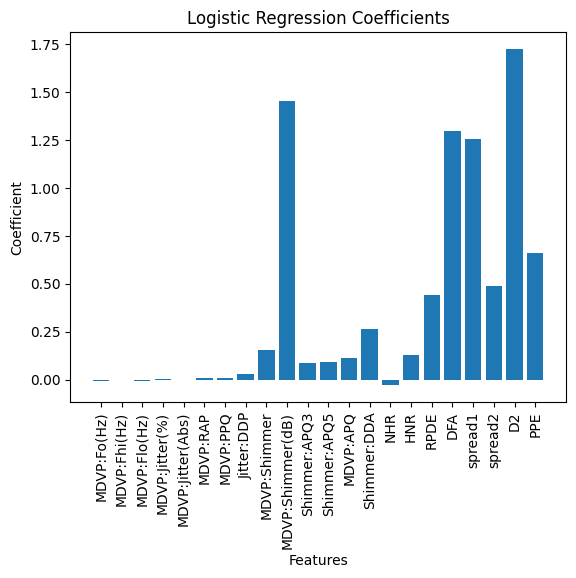

In [15]:
plt.bar(df.drop(['status'], axis=1).columns, lg_coeff)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')

## Dimensionality Reduction

### Reducing the dimensions to reduce the computation that is carried out but still retain the Explained Variance For Classification

In [16]:
from sklearn.decomposition import PCA

In [17]:
ideal_n_components = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

pca_component_variance_ranking = []

for i in ideal_n_components:
    pca = PCA(n_components=i)
    pca.fit(df.drop(['status'], axis=1))
    pca_component_variance_ranking.append(sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'PCA Component Variance Ranking')

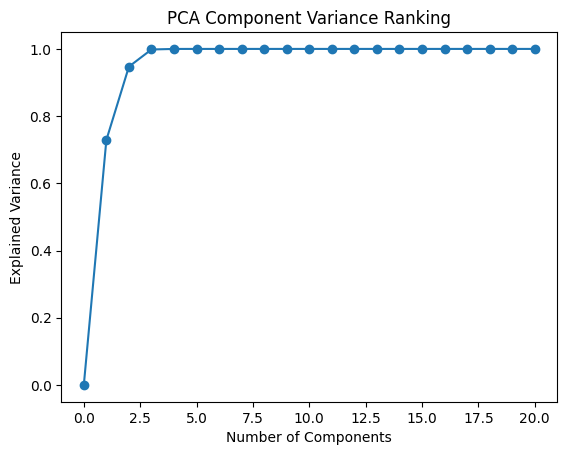

In [77]:
plt.plot(ideal_n_components, pca_component_variance_ranking, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Component Variance Ranking')

In [19]:
ideal_feature_comp = 4

pca = PCA(n_components=ideal_feature_comp)
df_pca = pca.fit_transform(df.drop(['status'], axis=1))

In [20]:
component_indices = pca.components_.argsort()[::-1][0][:4]

## Using K-Means To Cluster

### Using K-Means as a means to cluster the data and investigate the nature of the underlying points and see if they are clustered together or interspersed

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#### Scaling the data since they have their various values that need to be scaled. MinMax scaler performed better than Standard Scaler

In [22]:
scaler = MinMaxScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(df_pca_scaled)

In [24]:
kmeans.cluster_centers_

array([[0.12151456, 0.41907123, 0.50667812, 0.43850443],
       [0.38611913, 0.54988816, 0.40124055, 0.31534316]])

In [25]:
from mpl_toolkits.mplot3d import Axes3D

### As seen in the picture below, the clusters are in no way a perfect sphere but are spread out. This makes it apparent that K-Means wont work well

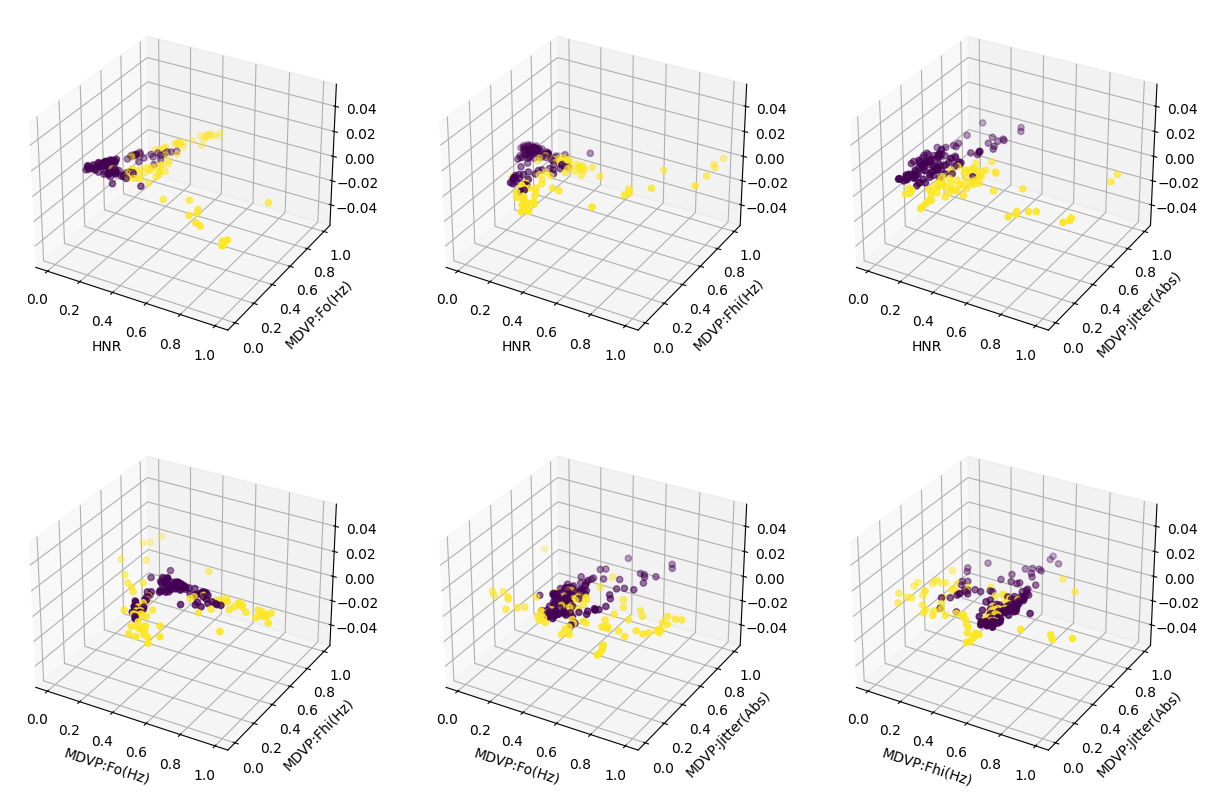

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': '3d'})

for ax,dimension in zip(axs.flatten(), [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]):
    ax.scatter(df_pca_scaled[:,dimension[0]], df_pca_scaled[:,dimension[1]], c=kmeans_labels, cmap='viridis')
    ax.set_xlabel(f'{df.columns[component_indices][dimension[0]]}')
    ax.set_ylabel(f'{df.columns[component_indices][dimension[1]]}')

In [27]:
df_pca = pd.DataFrame(df_pca, columns=df.columns[component_indices])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['status'], test_size=0.3)

### K-Means does not work well and has an accuracy rate of 37.29% which means that the values are definetly not clsutered together and are interspersed

In [29]:
pd.DataFrame({
    'Model': ['KMeans'],
    'Accuracy %':[round(accuracy_score(y_test, kmeans.predict(X_test))*100,2)]
})

c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,Model,Accuracy %
0,KMeans,37.29


In [30]:
from sklearn.mixture import GaussianMixture

### Using the previous inferences, Gaussian Mixture Models is used as an alternative EM method to see if the points are getting clustered properly.

In [31]:
gmm = GaussianMixture(n_components=2)

In [32]:
gmm.fit(df_pca_scaled)

GaussianMixture(n_components=2)

### The GMM is able to outperform the K-Means by a wide margin, which was expected since the values were interspesed as the previous guess

In [33]:
gmm_conf_matrix = confusion_matrix(y_test, gmm.predict(X_test))

pd.DataFrame({
    'Model': ['Gaussian Mixture Model'],
    'Accuracy %':[round(accuracy_score(y_test, gmm.predict(X_test))*100,2)]
})

c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(
c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


,Model,Accuracy %
0,Gaussian Mixture Model,81.36


## Using Classification Models

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
pd.DataFrame(df_pca,columns=df.columns[component_indices])

,HNR,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(Abs)
0,-49.702790,-44.495243,-3.940127,0.147816
1,-54.357102,-11.019336,17.030055,3.297248
2,-72.854413,-12.597009,17.917158,1.682061
3,-66.304920,-14.114768,18.651016,1.737742
4,-62.712834,-15.868356,19.190394,2.759096
...,...,...,...,...
190,35.519192,-12.334597,-24.944202,1.367874
191,64.388862,0.318811,-52.564732,1.295740
192,42.746464,-29.497127,-36.579349,2.350050
193,200.623243,-46.449496,-35.226479,0.919499


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['status'], test_size=0.3)

In [37]:
n_estimators = [1,2,4,8,16,32,64,100,200]
dt_depths = [1,2,4,8,16,32,64,100]

In [38]:
accuracy_scores = {}
oob_scores = {}
for i in n_estimators:
    for j in dt_depths:
        rf = RandomForestClassifier(n_estimators=i, max_depth=j, oob_score=True)
        rf.fit(X_train, y_train)
        accuracy_scores[(i,j)] = accuracy_score(y_test, rf.predict(X_test))
        oob_scores[(i,j)] = rf.oob_score_
   

c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comp

In [39]:
accuracy_scores

{(1, 1): 0.8135593220338984,
 (1, 2): 0.7966101694915254,
 (1, 4): 0.8135593220338984,
 (1, 8): 0.7288135593220338,
 (1, 16): 0.7457627118644068,
 (1, 32): 0.7627118644067796,
 (1, 64): 0.7796610169491526,
 (1, 100): 0.7796610169491526,
 (2, 1): 0.7627118644067796,
 (2, 2): 0.7627118644067796,
 (2, 4): 0.7627118644067796,
 (2, 8): 0.7796610169491526,
 (2, 16): 0.8305084745762712,
 (2, 32): 0.7966101694915254,
 (2, 64): 0.7966101694915254,
 (2, 100): 0.8135593220338984,
 (4, 1): 0.8135593220338984,
 (4, 2): 0.8305084745762712,
 (4, 4): 0.7796610169491526,
 (4, 8): 0.8135593220338984,
 (4, 16): 0.7966101694915254,
 (4, 32): 0.7796610169491526,
 (4, 64): 0.847457627118644,
 (4, 100): 0.847457627118644,
 (8, 1): 0.7627118644067796,
 (8, 2): 0.8135593220338984,
 (8, 4): 0.8305084745762712,
 (8, 8): 0.8305084745762712,
 (8, 16): 0.8305084745762712,
 (8, 32): 0.847457627118644,
 (8, 64): 0.8135593220338984,
 (8, 100): 0.8135593220338984,
 (16, 1): 0.7627118644067796,
 (16, 2): 0.8135593220338

### Determining the proper number of estimators and the optimal depth for the bagging model. The graph shows the change in accuracy rate as the parameters are changed

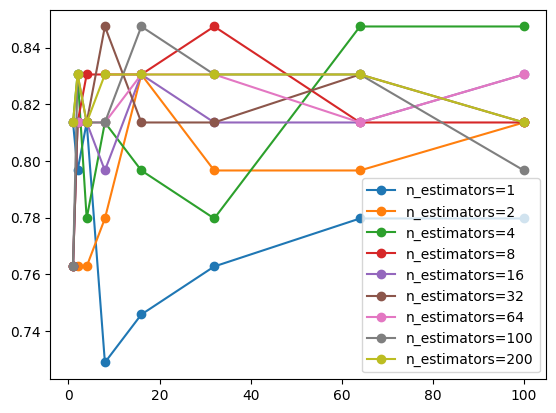

In [40]:
for i in n_estimators:
    plt.plot(dt_depths, [accuracy_scores[(i,j)] for j in dt_depths], label=f'n_estimators={i}', marker='o')
plt.legend()

In [41]:
opt_estimators = max(n_estimators, key=lambda x: max([accuracy_scores[(x,j)] for j in dt_depths]))
opt_depth = max(dt_depths, key=lambda x: accuracy_scores[(opt_estimators,x)])
print(f'Optimal n_estimators: {opt_estimators}')
print(f'Optimal depth: {opt_depth}')
print(f'Accuracy: {round(accuracy_scores[(opt_estimators,opt_depth)]*100,2)}%')

Optimal n_estimators: 4
Optimal depth: 64
Accuracy: 84.75%


In [42]:
rf = RandomForestClassifier(n_estimators=opt_estimators,max_depth=opt_depth,random_state=42)

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, n_estimators=4, random_state=42)

In [44]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_conf_matrix = confusion_matrix(y_test, rf.predict(X_test))

In [45]:
from sklearn.svm import SVC

In [46]:
svc_linear = SVC(kernel='linear',random_state=42)
svc_poly = SVC(kernel='poly',random_state=42)
svc_rbf = SVC(kernel='rbf',random_state=42)

In [47]:
svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [48]:
svm_linear_accuracy = accuracy_score(y_test, svc_linear.predict(X_test))
svm_linear_conf_matrix = confusion_matrix(y_test, svc_linear.predict(X_test))
svm_poly_accuracy = accuracy_score(y_test, svc_poly.predict(X_test))
svm_poly_conf_matrix = confusion_matrix(y_test, svc_poly.predict(X_test))
svm_rbf_accuracy = accuracy_score(y_test, svc_rbf.predict(X_test))
svm_rbf_conf_matrix = confusion_matrix(y_test, svc_rbf.predict(X_test))

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
dt_accuracy = accuracy_score(y_test, dt.predict(X_test))
dt_conf_matrix = confusion_matrix(y_test, dt.predict(X_test))

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
knn_conf_matrix = confusion_matrix(y_test, knn.predict(X_test))

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gb = GaussianNB()

In [59]:
gb.fit(X_train, y_train)

GaussianNB()

In [60]:
nb_accuracy = accuracy_score(y_test, gb.predict(X_test))
nb_conf_matrix = confusion_matrix(y_test, gb.predict(X_test))

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
lda = LinearDiscriminantAnalysis()

In [63]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
lda_accuracy = accuracy_score(y_test, lda.predict(X_test))
lda_conf_matrix = confusion_matrix(y_test, lda.predict(X_test))

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [66]:
qda = QuadraticDiscriminantAnalysis()

In [67]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [68]:
qda_accuracy = accuracy_score(y_test, qda.predict(X_test))
qda_conf_matrix = confusion_matrix(y_test, qda.predict(X_test))

### The linear models are working better as well as the KNN model since the accuracy rate is high but more metrics like TPR & TNR rate are also needed

In [69]:
pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'SVM - Linear','SVM- Poly','SVM - Gaussian', 'Decision Tree', 'KNN','KMeans','GMM','Naive Bayes','LDA','QDA'],
    'Accuracy %':[round(lg_accuracy*100,2),round(rf_accuracy*100,2), round(svm_linear_accuracy*100,2),round(svm_poly_accuracy*100,2),round(svm_rbf_accuracy*100,2), round(dt_accuracy*100,2), round(knn_accuracy*100,2), round(accuracy_score(y_test, kmeans.predict(X_test))*100,2), round(accuracy_score(y_test, gmm.predict(X_test))*100,2), round(nb_accuracy*100,2), round(lda_accuracy*100,2), round(qda_accuracy*100,2)]
})

c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


,Model,Accuracy %
0,Logistic Regression,84.75
1,Random Forest,79.66
2,SVM - Linear,81.36
3,SVM- Poly,76.27
4,SVM - Gaussian,76.27
5,Decision Tree,76.27
6,KNN,81.36
7,KMeans,37.29
8,GMM,71.19
9,Naive Bayes,79.66


c:\Users\Akhilesh Warty\OneDrive\BU\Spring 2024\CS 677\Project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Log Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'SVM - Linear'),
  Text(3, 0, 'SVM - Poly'),
  Text(4, 0, 'SVM - RBF'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'KNN'),
  Text(7, 0, 'GMM'),
  Text(8, 0, 'Naive Bayes'),
  Text(9, 0, 'LDA'),
  Text(10, 0, 'QDA')])

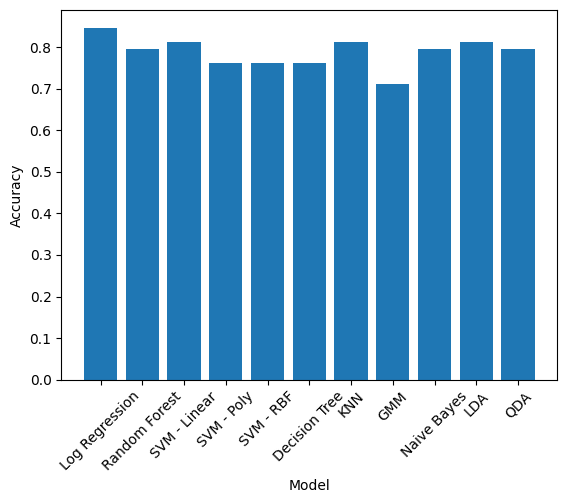

In [70]:
plt.bar(['Log Regression','Random Forest', 'SVM - Linear','SVM - Poly','SVM - RBF', 'Decision Tree', 'KNN','GMM','Naive Bayes','LDA','QDA'],[lg_accuracy, rf_accuracy, svm_linear_accuracy,svm_poly_accuracy,svm_rbf_accuracy, dt_accuracy, knn_accuracy, accuracy_score(y_test, gmm.predict(X_test)), nb_accuracy, lda_accuracy, qda_accuracy])
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)

In [72]:
def calculate_tpr(confusion_matrix):
    TP = confusion_matrix[1][1]  # True Positives
    FN = confusion_matrix[1][0]  # False Negatives
    TPR = TP / (TP + FN)         # True Positive Rate
    return TPR

def calculate_tnr(confusion_matrix):
    TN = confusion_matrix[0][0]  # True Negatives
    FP = confusion_matrix[0][1]  # False Positives
    TNR = TN / (TN + FP)         # True Negative Rate
    return TNR

### Random Forest seems to do well in this regard as well as the SVM- Linear Classifier, the Decision Tree is worse than the RF with respect to TPR but is better with respect to TNR

In [75]:
pd.DataFrame({
    'Models':['Logistic Regression','Random Forest','SVM - Linear','SVM - Poly','SVM - RBF','Decision Tree','KNN','KMeans','GMM','Naive Bayes','LDA','QDA'],
    'TPR':[calculate_tpr(lg_conf_matrix), calculate_tpr(rf_conf_matrix), calculate_tpr(svm_linear_conf_matrix), calculate_tpr(svm_poly_conf_matrix), calculate_tpr(svm_rbf_conf_matrix), calculate_tpr(dt_conf_matrix), calculate_tpr(knn_conf_matrix), calculate_tpr(gmm_conf_matrix), calculate_tpr(gmm_conf_matrix), calculate_tpr(nb_conf_matrix), calculate_tpr(lda_conf_matrix), calculate_tpr(qda_conf_matrix)],
    'TNR':[calculate_tnr(lg_conf_matrix), calculate_tnr(rf_conf_matrix), calculate_tnr(svm_linear_conf_matrix), calculate_tnr(svm_poly_conf_matrix), calculate_tnr(svm_rbf_conf_matrix), calculate_tnr(dt_conf_matrix), calculate_tnr(knn_conf_matrix), calculate_tnr(gmm_conf_matrix), calculate_tnr(gmm_conf_matrix), calculate_tnr(nb_conf_matrix), calculate_tnr(lda_conf_matrix), calculate_tnr(qda_conf_matrix)],
})

,Models,TPR,TNR
0,Logistic Regression,0.977778,0.428571
1,Random Forest,0.853659,0.666667
2,SVM - Linear,0.975610,0.444444
3,SVM - Poly,1.000000,0.222222
4,SVM - RBF,1.000000,0.222222
5,Decision Tree,0.804878,0.666667
6,KNN,0.975610,0.444444
7,KMeans,0.956522,0.307692
8,GMM,0.956522,0.307692
9,Naive Bayes,0.951220,0.444444
